# Project: Titanic - Machine Learning from Disater
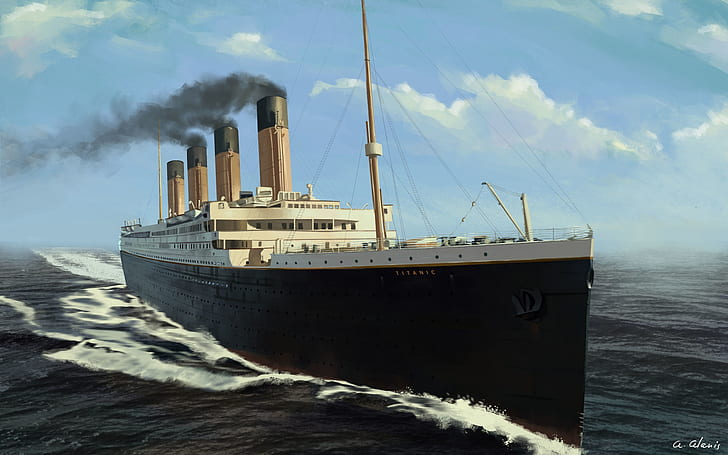

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
train_df = pd.read_csv("C:/Users/Admin/Desktop/Titanic_Kaggle/train.csv")
test_df = pd.read_csv("C:/Users/Admin/Desktop/Titanic_Kaggle/test.csv")

In [268]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [269]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Notes:
* `SibSp`: siblings/spouses aboard the Titanic
* `Parch`: parents/children aboard the Titanic
* `Ticket`: Ticket number
* `Cabin`: Cabin number


In [270]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
train_df.set_index(train_df.PassengerId, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
train_df.drop('PassengerId',axis=1,inplace=True)

In [273]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [274]:
test_df = pd.read_csv("C:/Users/Admin/Desktop/Titanic_Kaggle/test.csv", index_col='PassengerId')

In [275]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 1. Feature Classification: Categorical vs Numerical
* This helps us select the appropriate plots for visualization
### Which features are categorical?
* Categorical Features: `nominal`,`ordinal`,`ratio`,`interval`
* To classify the samples into sets of similar samples
### Which features are numerical?
* Numerical features: `discrete`, `continuous`, `timeseries`
* These values change from sample to sample

In [276]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [277]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Survived`,`Sex`,`Embarked`,`Pclass`,`SibSp`,`Parch`-ordinal
* Numerical: `Age`-continuous, `Fare`-discrete
* Mix types of data: `Ticker`,`Cabin`
* Contain Error/Typo: `Name`
* Blank or Null: `Cabin`>`Age`>`Embarked`
* Various Data Type: String, Int, Float

In [278]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [279]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [280]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [281]:
features = ['Pclass','Sex','SibSp','Parch','Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [282]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Distribution of Numerical feature values across the samples

In [283]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Categorical features

In [284]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2. Exploratory Data Analysis(EDA)

## 2.1 Correlating categorical features 
* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal),`SibSp`,`Parch`

  ## Target Variable: `Survived`

In [285]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [286]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


## `Sex`

In [287]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


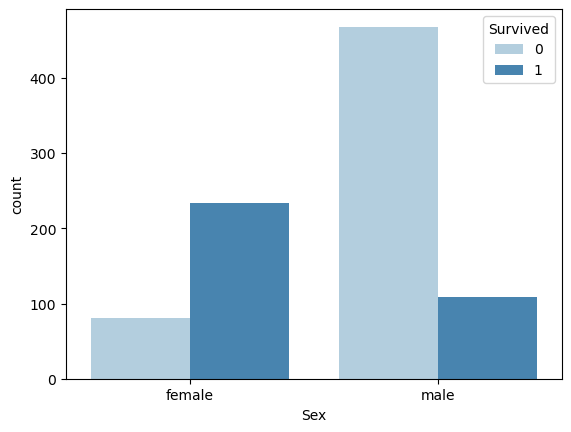

In [288]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues');

- Remaining Categorical Feature Columns

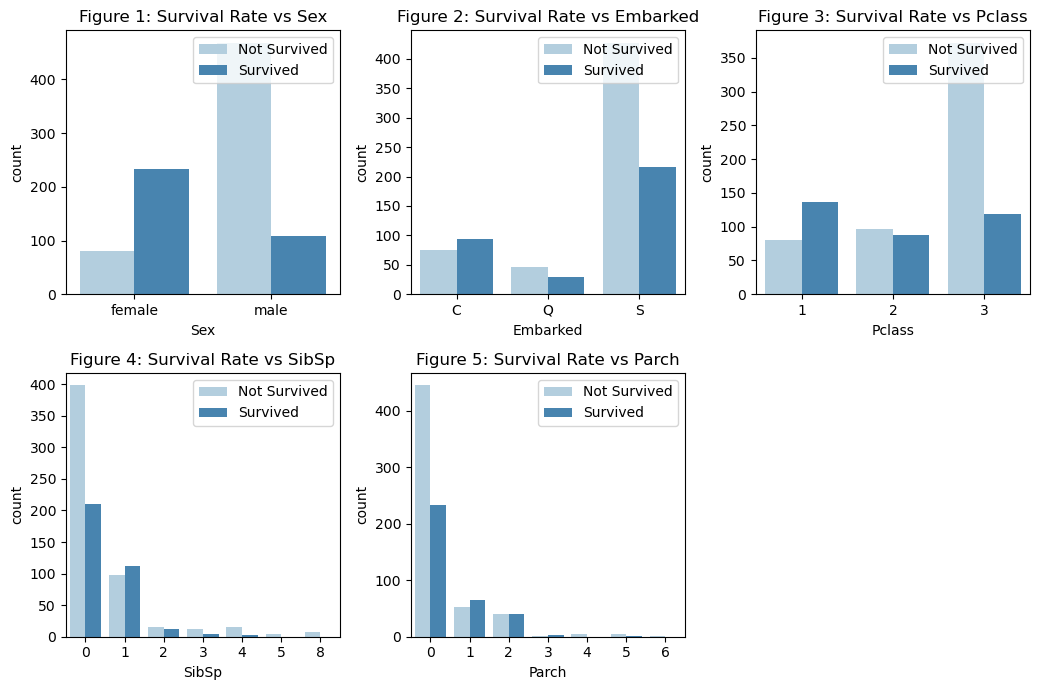

In [289]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']

n_rows = 2
n_cols = 3


fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list 'cols'
        if i < len(cols):
                ax_i = ax[r,c]
                sns.countplot(data=train_df, x=cols[i], hue='Survived',palette='Blues', ax = ax_i)
                ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
                ax_i.legend(title='',loc='upper right',labels=['Not Survived','Survived'])
ax.flat[-1].set_visible(False) #remove the last subplot
plt.tight_layout()
plt.show()

### Observation:
* **Survival Rate**:
    - Fig 1: Female survival rate > male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 `SibSp` are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 `Parch` are mostly not survived

## 2.2 EDA for Numerical Features

* Numerical Features: (continuous) `Age`, `Fare`

### Age

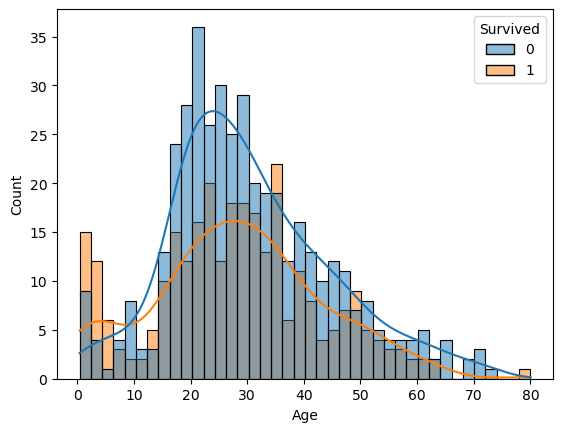

In [290]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins=40, kde=True);

* Majority passengers were from 18-40 ages
* Children had more chance to survive than other ages

### Fare

In [291]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

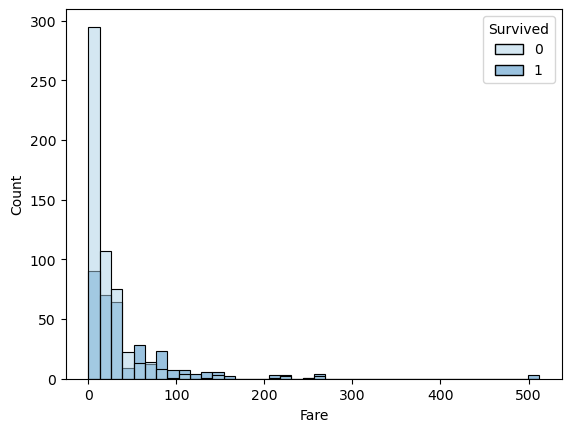

In [292]:
sns.histplot(data=train_df, x='Fare',hue='Survived', bins=40, palette='Blues');

<AxesSubplot:xlabel='Fare', ylabel='count'>

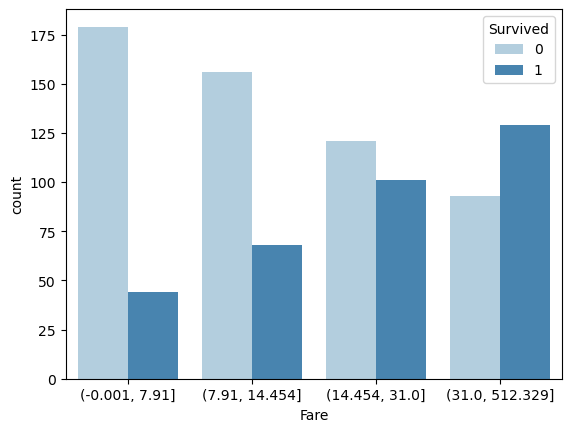

In [293]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues')

In [294]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

* Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range `[0-100$]`
    - The distribution is skewed to the left wiht`75%` of the fare paid under `$31` and a max paid fare of `$512`
* Quartile plot
    - Passenger with Luxury& Expensive Fare will have more chance to survive

# 3. Feature Engineering & Data Wrangling
### Name
- Regular Expression

In [295]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [296]:
import re #regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [297]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [298]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

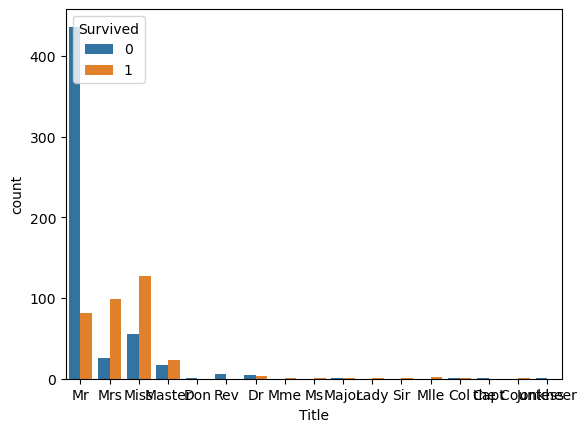

In [299]:
sns.countplot(data=train_df, x='Title', hue='Survived');

In [300]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else: 
        return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [301]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

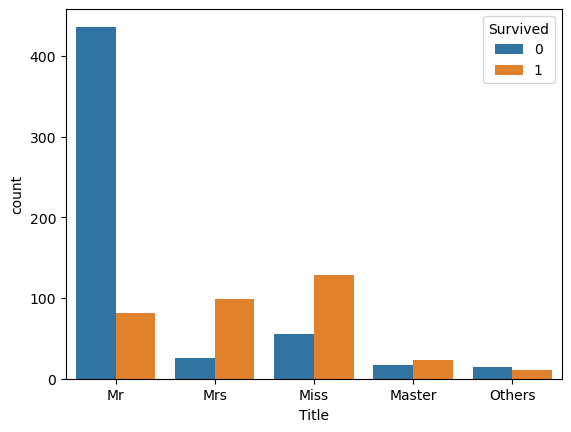

In [302]:
sns.countplot(data=train_df, x='Title', hue='Survived');

# Family
- `SibSp`,`Parch`

In [303]:
train_df['Family_Size'] = train_df['SibSp'].astype('int')+train_df['Parch'].astype('int') + 1

In [304]:
test_df['Family_Size'] = test_df['SibSp'].astype('int')+train_df['Parch'].astype('int') + 1

In [305]:
train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small','Medium','Large']) #(0,1],(1,4],(4,6],(6,20]
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small','Medium','Large']) #(0,1],(1,4],(4,6],(6,20]

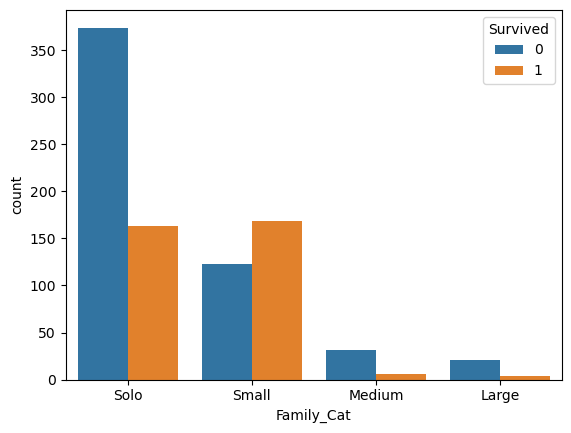

In [306]:
sns.countplot(data=train_df, x ='Family_Cat', hue='Survived');

## Data Wrangling

In [307]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features+cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [308]:
def display_missing(df, feature_cols):
    n_rows=df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print(f"{col} has {missing_count*100/n_rows:.2f}%missing values.")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87%missing values.
Embarked has 0.22%missing values.
Age has 20.57%missing values.
Fare has 0.24%missing values.
Family_Cat has 100.00%missing values.


### Filling missing values

### Age
- Fill missing values with `median` of whole dataset

In [309]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']

In [310]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [311]:
#Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age']=train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age']=test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [312]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22%missing values.
Fare has 0.24%missing values.
Family_Cat has 100.00%missing values.


In [313]:
x = train_df[feature_cols]
y = train_df['Survived']

In [314]:
x_test = test_df[feature_cols]

In [315]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [316]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [317]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [318]:
x = preprocessor.transform(x)   #x => x_train,x_val


In [319]:
x_test = preprocessor.transform(x_test)

# 5. Model Training

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)

In [322]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [323]:
x_test.shape

(418, 19)

In [324]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
#sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [325]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)   #update log_reg dua vao x_train, y_train

LogisticRegression(max_iter=1000, solver='liblinear')

log_reg.score(x_val, y_val)    #dat diem chinh xac bao nhieu => so sanh voi x_val,y_val

In [326]:
y_pred = log_reg.predict(x_val)

In [327]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8709677419354839, 0.84375)

In [328]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       115
           1       0.87      0.84      0.86        64

    accuracy                           0.90       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.90      0.90      0.90       179



- y = a*x1 + b*x2 + bias -> y = a*x1^2 +b*x^2 + c x1*x2 + bias

In [329]:
poly = PolynomialFeatures(degree=2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [330]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [331]:
poly_log_reg.score(poly_features_x_val, y_val)

0.9050279329608939

In [332]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [333]:
decision_tree.score(x_val, y_val)

0.8994413407821229

## 5.1 Cross-Validation

In [334]:
from sklearn.model_selection import cross_val_score

In [335]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring='accuracy', cv=5)

In [336]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [337]:
dt_scores = cross_val_score(dt_cv, x, y, scoring='accuracy', cv=5)

In [338]:
dt_scores.mean(), dt_scores.std()

(0.8137216747222397, 0.014388618786467437)

## 5.2 Baseline Model Comparison

In [349]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

from xgboost import XGBClassifier  #!pip install xgboost
seed = 2023

models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p = 2),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier( eval_metric='logloss', random_state=seed)
]

In [359]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
    #define K-fold:
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,x,y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns=['model_name','fold_id','accuracy_score'])
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color="lighblue", showmeans=True)
        plt.title("Boxplot of Base-line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
#    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
#    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
#    baseline_results = pd.concat([mean,std],axis=1,ignore_index=True)
#    baseline_results.columns = ['Mean','Standard Daviation']
    
    #sort by accuracy
#    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    return cv_df

generate_baseline_results(models, x, y, metrics='accuracy', cv=5, plot_results=False)   



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,model_name,fold_id,accuracy_score
0,LinearSVC,0,0.821229
1,LinearSVC,1,0.859551
2,LinearSVC,2,0.848315
3,LinearSVC,3,0.837079
4,LinearSVC,4,0.764045
5,SVC,0,0.832402
6,SVC,1,0.870787
7,SVC,2,0.842697
8,SVC,3,0.848315
9,SVC,4,0.786517
